# Classifying 2D Data with a Two-Layer Neural Network

 This notebook provides you with a complete code example that loads the data in the `data_class_2d_convex_clean.csv` file, trains a two-layer neural network to classify it, and finally uses it to classify the test data in the `data_class_2d_convex_clean_test.csv` file. 

## Loading and Plotting the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_class_2d_convex_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-1.85714572e+00  8.84031190e-01]
 [ 1.28168793e+00 -6.16053092e-01]
 [-7.63875577e-01 -9.78911810e-01]
 [-2.82886194e-02 -3.70336627e-01]
 [ 1.01915959e+00  6.10208214e-01]
 [ 6.05633497e-01 -4.10462939e-02]
 [-1.66662442e+00 -6.03260213e-01]
 [-7.52577177e-02  1.22559116e-02]
 [ 2.45299809e+00  1.98951164e+00]
 [-1.23166237e-01  3.46114322e-01]
 [-2.88889017e-01 -8.61139813e-01]
 [-2.35671166e+00  3.19917360e-01]
 [-6.62043487e-01  1.16967457e+00]
 [-1.21989583e+00 -7.27511157e-01]
 [ 1.11830794e+00 -5.60733389e-01]
 [ 1.17966167e+00  5.86114530e-01]
 [ 1.39624509e+00  3.93363154e-01]
 [-2.15423298e-01  3.68900432e-01]
 [ 1.29689380e+00 -1.06305978e+00]
 [-3.46881498e-01  1.52964546e-01]
 [ 6.94857156e-01  6.20697924e-01]
 [-1.43270884e+00  2.01623242e-01]
 [-1.85210133e+00  6.25857537e-01]
 [-1.13473583e+00 -3.64487543e-01]
 [ 6.19234929e-01 -8.09500293e-01]
 [ 5.21638769e-01 -3.48472092e-01]
 [-5.87454459e-01 -8.26845039e-01]
 [ 2.93064627e-01  7.90335832e-01]
 [ 1.38560440e+00

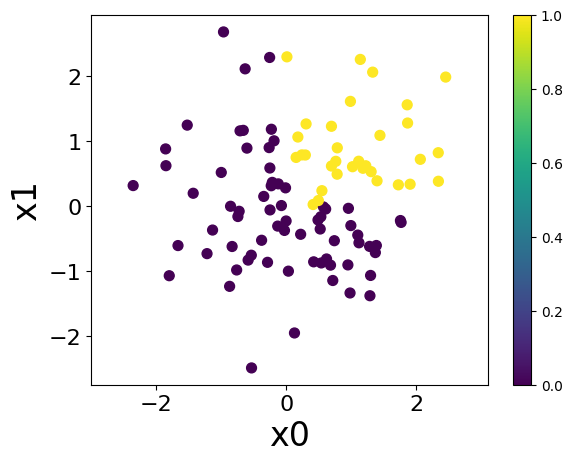

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Implementing a Dense Neural Network

Implement the sigmoidal activation function ...

In [3]:
from numpy import exp

def sigmoid(x):
    """Sigmoid function."""
    return 1 / (1 + exp(-x))

... implement a function to define the neural network ...

In [4]:
def dnn2_clas(wa, wb, x):
    """Two-layer dense neural network for classification.""" 
    x_a = x  # Input layer 1.
    p_a = x_a @ wa  # Activation potential layer 1.
    y_a = sigmoid(p_a)  # Output layer 1.
    
    x_b = y_a  # Input layer 2.
    p_b = x_b @ wb  # Activation potential layer 2.
    y_b = sigmoid(p_b)  # Output layer 2 (output neuron).
    
    return y_b

... define the number of neurons in the first layer ...

In [5]:
num_neurons = 3

... randomly initialize its weights ...

In [6]:
from numpy.random import default_rng

rng = default_rng()
wa = rng.standard_normal(size=(2, num_neurons))  # Input weights layer 1.
wb = rng.standard_normal(size=(num_neurons, 1))  # Input weights layer 2.

... obtain its predictions for the input data ...

In [7]:
y_p = dnn2_clas(wa, wb, x)

... and plot its predictions.

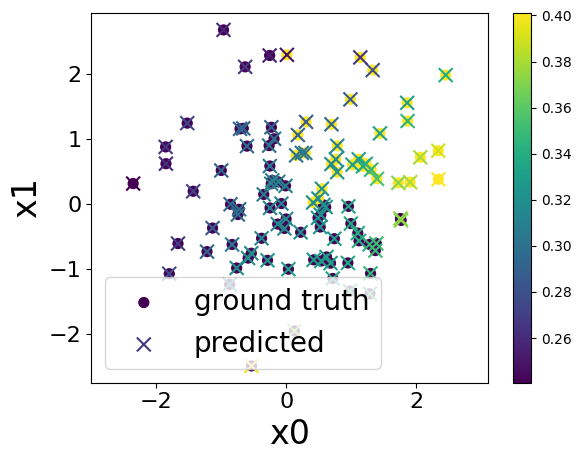

In [8]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x))

## Training with the Backpropagation Algorithm

Implement the first derivative of the sigmoid function ...

In [9]:
def d_sigmoid(x):
    """Derivative of sigmoid function."""
    return sigmoid(x) * (1 - sigmoid(x))

... implement the backpropagation algorithm ...

In [10]:
from numpy import reshape, transpose, sum

num_samples = len(x)
num_train_iterations = 10 ** 5
eta = .1  # Learning rate.

for i in range(num_train_iterations):
    # Select random sample.
    selected = rng.integers(0, num_samples)
    x_selected = reshape(x[selected], (1, -1))
    y_gt_selected = reshape(y_gt[selected], (1, -1))
    
    # Detailed neural network calculation.
    x_selected_a = x_selected  # Input layer 1.
    p_a = x_selected_a @ wa  # Activation potential layer 1.
    y_selected_a = sigmoid(p_a)  # Output layer 1.

    x_selected_b = y_selected_a  # Input layer 2.
    p_b = x_selected_b @ wb  # Activation potential layer 2.
    y_selected_b = sigmoid(p_b)  # Output layer 2 (output neuron).
    
    y_p_selected = y_selected_b

    # Update weights.
    error = y_p_selected - y_gt_selected

    delta_b = error * d_sigmoid(p_b)
    wb = wb - eta * delta_b * transpose(x_selected_b)

    delta_a = sum(wb * delta_b, axis=1) * d_sigmoid(p_a)
    wa = wa - eta * delta_a * transpose(x_selected_a)

    if i % 100 == 0:
        print(f"{i} y_p={y_p_selected[0, 0]:.2f} error = {error[0, 0]:.2f}")

0 y_p=0.32 error = -0.68
100 y_p=0.29 error = 0.29
200 y_p=0.30 error = 0.30
300 y_p=0.13 error = 0.13
400 y_p=0.43 error = -0.57
500 y_p=0.49 error = -0.51
600 y_p=0.22 error = 0.22
700 y_p=0.32 error = -0.68
800 y_p=0.11 error = 0.11
900 y_p=0.09 error = 0.09
1000 y_p=0.42 error = -0.58
1100 y_p=0.26 error = 0.26
1200 y_p=0.27 error = 0.27
1300 y_p=0.17 error = 0.17
1400 y_p=0.11 error = 0.11
1500 y_p=0.12 error = 0.12
1600 y_p=0.48 error = -0.52
1700 y_p=0.11 error = 0.11
1800 y_p=0.12 error = 0.12
1900 y_p=0.25 error = 0.25
2000 y_p=0.45 error = -0.55
2100 y_p=0.19 error = 0.19
2200 y_p=0.49 error = -0.51
2300 y_p=0.48 error = -0.52
2400 y_p=0.03 error = 0.03
2500 y_p=0.12 error = 0.12
2600 y_p=0.44 error = -0.56
2700 y_p=0.46 error = -0.54
2800 y_p=0.30 error = 0.30
2900 y_p=0.45 error = -0.55
3000 y_p=0.24 error = 0.24
3100 y_p=0.04 error = 0.04
3200 y_p=0.05 error = 0.05
3300 y_p=0.17 error = 0.17
3400 y_p=0.15 error = 0.15
3500 y_p=0.25 error = -0.75
3600 y_p=0.04 error = 0.04


... and plot its predictions.

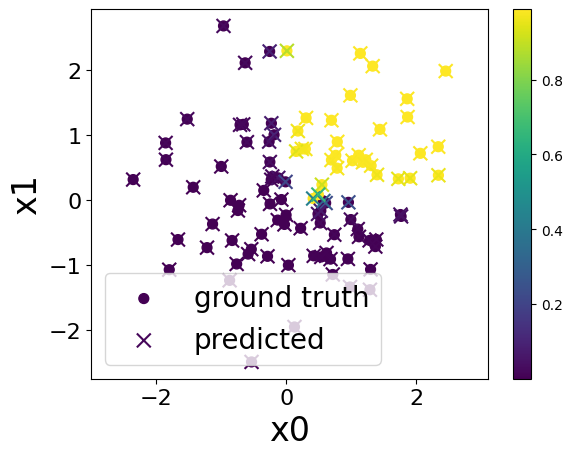

In [11]:
plot_pred_2d(x, y_gt, y_p=dnn2_clas(wa, wb, x))

## Testing the Performance of the Trained Neural Network

Check how the trained neuron works on the test data.

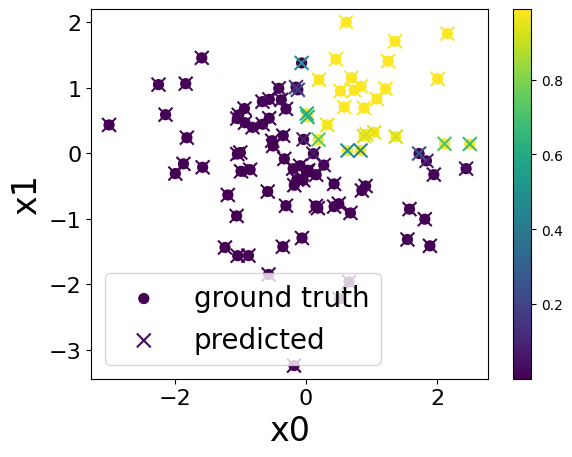

In [12]:
(x_test, y_gt_test) = load_data(filename="data_class_2d_convex_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=dnn2_clas(wa, wb, x_test))